In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [132]:
df = pd.read_excel('foil.xlsx')

In [133]:
x = df['x']
y = df['y']

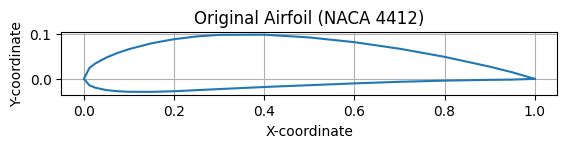

In [134]:
plt.plot(x,y)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil (NACA 4412)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

In [135]:
x = df['x'].values
y = df['y'].values

In [136]:
from numpy import nan

In [137]:
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [138]:
x

array([1.    , 0.95  , 0.9   , 0.8   , 0.7   , 0.6   , 0.5   , 0.4   ,
       0.3   , 0.25  , 0.2   , 0.15  , 0.1   , 0.075 , 0.05  , 0.025 ,
       0.0125, 0.    , 0.0125, 0.025 , 0.05  , 0.075 , 0.1   , 0.15  ,
       0.2   , 0.25  , 0.3   , 0.4   , 0.5   , 0.6   , 0.7   , 0.8   ,
       0.9   , 0.95  , 1.    ])

In [139]:
y

array([ 0.    ,  0.0147,  0.0271,  0.0489,  0.0669,  0.0814,  0.0919,
        0.098 ,  0.0976,  0.0941,  0.088 ,  0.0789,  0.0659,  0.0576,
        0.0473,  0.0339,  0.0244,  0.    , -0.0143, -0.0195, -0.0249,
       -0.0274, -0.0286, -0.0288, -0.0274, -0.025 , -0.0226, -0.018 ,
       -0.014 , -0.01  , -0.0065, -0.0039, -0.0022, -0.0016,  0.    ])

In [140]:
def hicks_henne(x_coord, y_coord , n, a, w, xM):
    y_deformed = np.array(y_coord)
    for i in range(n):
        ai = a[i]
        xMi = xM[i]
        wi = w[i]
        m = np.log(0.5)/np.log(xMi)
        y_deformed += ai * np.sin(np.pi * np.array(x_coord) ** m )**wi

    return y_deformed   

In [141]:
n = 11
a_up = [0.00625, 0.00125, 0.00375, 0.00375, 0.00125, 0.00625, 0.00875, 0.00875, 0.00375, 0.00125, 0.00125]
a_low = [0.001, -0.03, 0.03, -0.04, 0.03, -0.02, 0.01, -0.005, 0.003, -0.002, 0.001]
w = np.full(11,2)  

In [142]:
xM = np.array([])
for i in range(1,n+1):
    x_m = 0.5 * (1 - math.sin(math.pi * i / n))
    xM = np.append(xM,x_m)

In [143]:
xM

array([0.35913372, 0.22967959, 0.12212521, 0.045184  , 0.00508928,
       0.00508928, 0.045184  , 0.12212521, 0.22967959, 0.35913372,
       0.5       ])

In [144]:
def split_list(arr):
    half = len(arr)//2
    return arr[:half+1], arr[half+1:]

x_up, x_low = split_list(x)
y_up, y_low = split_list(y)

In [145]:
x_up

array([1.    , 0.95  , 0.9   , 0.8   , 0.7   , 0.6   , 0.5   , 0.4   ,
       0.3   , 0.25  , 0.2   , 0.15  , 0.1   , 0.075 , 0.05  , 0.025 ,
       0.0125, 0.    ])

In [146]:
x_low

array([0.0125, 0.025 , 0.05  , 0.075 , 0.1   , 0.15  , 0.2   , 0.25  ,
       0.3   , 0.4   , 0.5   , 0.6   , 0.7   , 0.8   , 0.9   , 0.95  ,
       1.    ])

In [147]:
y_up

array([0.    , 0.0147, 0.0271, 0.0489, 0.0669, 0.0814, 0.0919, 0.098 ,
       0.0976, 0.0941, 0.088 , 0.0789, 0.0659, 0.0576, 0.0473, 0.0339,
       0.0244, 0.    ])

In [148]:
y_low

array([-0.0143, -0.0195, -0.0249, -0.0274, -0.0286, -0.0288, -0.0274,
       -0.025 , -0.0226, -0.018 , -0.014 , -0.01  , -0.0065, -0.0039,
       -0.0022, -0.0016,  0.    ])

In [149]:
y_mod_up = hicks_henne(x_up, y_up, n, a_up, w, xM)
y_mod_low = hicks_henne(x_low, y_low, n, a_low, w, xM)
y_mod = np.concatenate((y_mod_up, y_mod_low))

In [150]:
y_mod

array([ 6.93638899e-34,  1.48985821e-02,  2.79035350e-02,  5.21327997e-02,
        7.40528508e-02,  9.36328044e-02,  1.09894064e-01,  1.21866294e-01,
        1.26819278e-01,  1.25574918e-01,  1.21285993e-01,  1.13342116e-01,
        1.00407147e-01,  9.14118856e-02,  7.94821471e-02,  6.23977080e-02,
        4.89289485e-02,  0.00000000e+00, -2.29894761e-02, -3.10500955e-02,
       -3.94973421e-02, -4.39773242e-02, -4.66586340e-02, -4.87654559e-02,
       -4.81067622e-02, -4.54885646e-02, -4.21146674e-02, -3.40834680e-02,
       -2.57920455e-02, -1.76357157e-02, -1.07147461e-02, -5.69937103e-03,
       -2.62632279e-03, -1.70345793e-03, -3.29947152e-34])

In [151]:
x

array([1.    , 0.95  , 0.9   , 0.8   , 0.7   , 0.6   , 0.5   , 0.4   ,
       0.3   , 0.25  , 0.2   , 0.15  , 0.1   , 0.075 , 0.05  , 0.025 ,
       0.0125, 0.    , 0.0125, 0.025 , 0.05  , 0.075 , 0.1   , 0.15  ,
       0.2   , 0.25  , 0.3   , 0.4   , 0.5   , 0.6   , 0.7   , 0.8   ,
       0.9   , 0.95  , 1.    ])

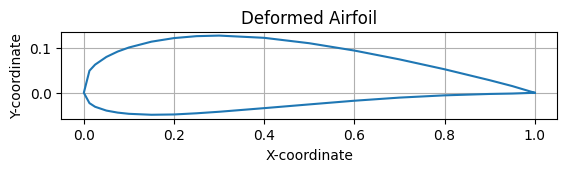

In [152]:
plt.plot(x,y_mod)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

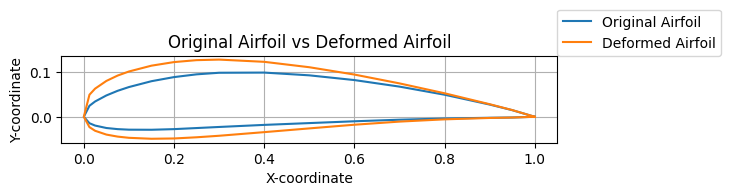

In [153]:
plt.plot(x, y, label = "Original Airfoil")
plt.plot(x, y_mod, label = "Deformed Airfoil")
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil vs Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend(loc=(1,1))
plt.grid()

In [154]:
df1 = pd.DataFrame({'x': x, 'y_modified': y_mod} )

In [155]:
df1.head()

,x,y_modified
0,1.00,6.936389e-34
1,0.95,1.489858e-02
2,0.90,2.790353e-02
3,0.80,5.213280e-02
4,0.70,7.405285e-02


In [156]:
path = "C:/Users/user/OneDrive - BUET/Desktop/Deform/Hicks-Henne deformation of 2d airfoil/Deformed_airfoil.xlsx" #give the path you want save the airfoil co-ordinates in
with pd.ExcelWriter(path, mode = "a", engine = "openpyxl", if_sheet_exists = "replace") as writer:
    df1.to_excel(writer, index = False)